In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector


# Loading the Products dataset
products = pd.read_csv("D:/Products.csv", encoding='latin1')
print(products.head())




   ProductKey                         Product Name    Brand   Color  \
0           1  Contoso 512MB MP3 Player E51 Silver  Contoso  Silver   
1           2    Contoso 512MB MP3 Player E51 Blue  Contoso    Blue   
2           3     Contoso 1G MP3 Player E100 White  Contoso   White   
3           4    Contoso 2G MP3 Player E200 Silver  Contoso  Silver   
4           5       Contoso 2G MP3 Player E200 Red  Contoso     Red   

  Unit Cost USD Unit Price USD  SubcategoryKey Subcategory  CategoryKey  \
0        $6.62         $12.99              101     MP4&MP3            1   
1        $6.62         $12.99              101     MP4&MP3            1   
2        $7.40         $14.52              101     MP4&MP3            1   
3       $11.00         $21.57              101     MP4&MP3            1   
4       $11.00         $21.57              101     MP4&MP3            1   

  Category  
0    Audio  
1    Audio  
2    Audio  
3    Audio  
4    Audio  


In [2]:
# Data Information
print("\nProducts Data Info:")
products.info()




Products Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [3]:
products

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones


In [4]:
# Cleaning dataset
# Remove dollar sign and convert 'Unit Cost USD' and 'Unit Price USD' to numeric
products['Unit Cost USD'] = products['Unit Cost USD'].replace(r'[\$,]', '', regex=True).astype(float)
products['Unit Price USD'] = products['Unit Price USD'].replace(r'[\$,]', '', regex=True).astype(float)

# Check for missing values 
missing_values = products.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64


        ProductKey  Unit Cost USD  Unit Price USD  SubcategoryKey  CategoryKey
count  2517.000000    2517.000000     2517.000000     2517.000000  2517.000000
mean   1259.000000     147.655562      356.830131      491.810091     4.878824
std     726.739637     184.373683      494.054962      229.887134     2.299170
min       1.000000       0.480000        0.950000      101.000000     1.000000
25%     630.000000      32.250000       69.000000      305.000000     3.000000
50%    1259.000000      86.670000      199.990000      406.000000     4.000000
75%    1888.000000     183.950000      410.000000      801.000000     8.000000
max    2517.000000    1060.220000     3199.990000      808.000000     8.000000


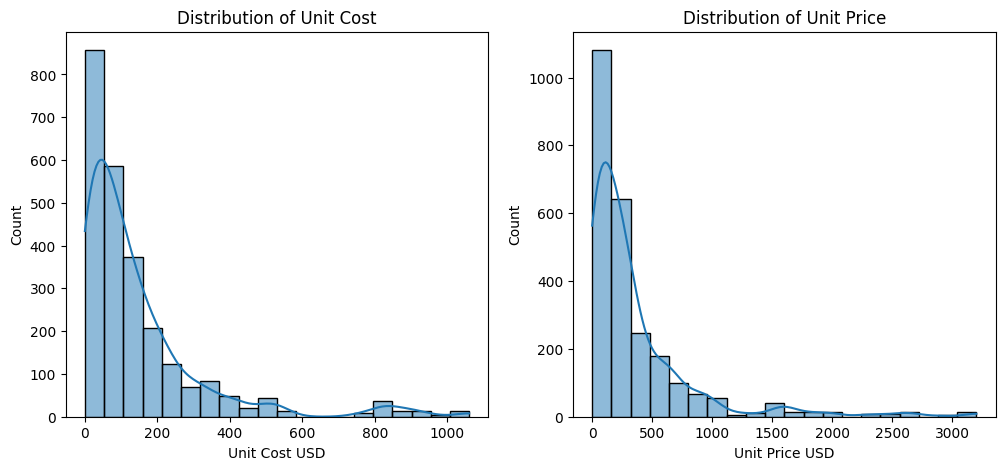

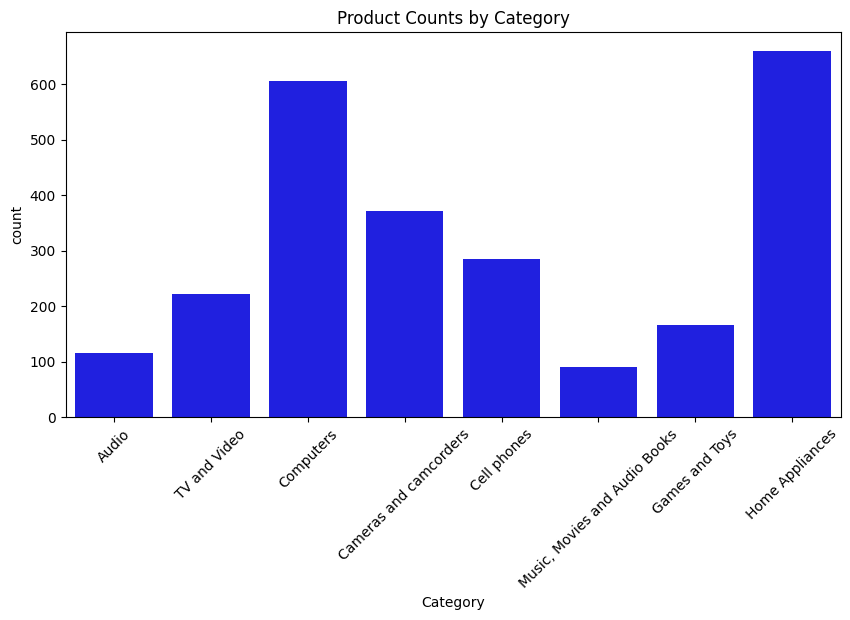

In [5]:
#Exploratory Data Analysis (EDA)

# Summary statistics
print(products.describe())

# Visualize the distribution of Unit Cost and Unit Price
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(products['Unit Cost USD'], bins=20, kde=True)
plt.title('Distribution of Unit Cost')

plt.subplot(1, 2, 2)
sns.histplot(products['Unit Price USD'], bins=20, kde=True)
plt.title('Distribution of Unit Price')
plt.show()

# Count plot for each Category
plt.figure(figsize=(10, 5))
sns.countplot(data=products, x='Category', color='blue')
plt.title('Product Counts by Category')
plt.xticks(rotation=45)
plt.show()



In [6]:
# Connecting to MySQL database
db_connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="3008",
    database="global_electronics"
)

cursor = db_connection.cursor()

# Create table if it doesn't exist
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Products (
        ProductKey INT PRIMARY KEY,
        ProductName VARCHAR(255),
        Brand VARCHAR(255),
        Color VARCHAR(50),
        UnitCostUSD DECIMAL(10, 2),
        UnitPriceUSD DECIMAL(10, 2),
        SubcategoryKey INT,
        Subcategory VARCHAR(255),
        CategoryKey INT,
        Category VARCHAR(255)
    );
''')

# Convert each row of the DataFrame to a tuple for SQL insertion
rows_to_insert = [tuple(row) for row in products.values]

# Insert data in batches
batch_size = 500  
for start in range(0, len(rows_to_insert), batch_size):
    batch = rows_to_insert[start:start + batch_size]
    
    try:
        cursor.executemany('''
            INSERT IGNORE INTO Products (ProductKey, ProductName, Brand, Color, UnitCostUSD, UnitPriceUSD, SubcategoryKey, Subcategory, CategoryKey, Category)
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
        ''', batch)
        db_connection.commit()
    except mysql.connector.Error as err:
        print(f"Error in batch {start // batch_size + 1}: {err}")
        db_connection.rollback()

# Confirm successful insertions by counting rows in the table
cursor.execute("SELECT COUNT(*) FROM Products")
row_count = cursor.fetchone()[0]
print(f"Total products inserted: {row_count}")

# Close the cursor and database connection
cursor.close()
db_connection.close()

Total products inserted: 2517
